In [1]:
!pip install memory-profiler

In [ ]:
from memory_profiler import memory_usage

In [2]:
import time
import random
from typing import List, Callable, Any
import matplotlib.pyplot as plt
from memory_profiler import memory_usage  # pip install memory-profiler


def time_function(fn: Callable[..., Any], *args, repeats: int = 3, **kwargs) -> float:
    """
    Measure the average execution time of a function.

    Args:
        fn: Function to time.
        *args: Positional arguments for the function.
        repeats: Number of times to repeat the function execution (default=3).
        **kwargs: Keyword arguments for the function.

    Returns:
        float: Average execution time in seconds.
    """
    durations = []
    for _ in range(repeats):
        start = time.perf_counter()
        fn(*args, **kwargs)
        end = time.perf_counter()
        durations.append(end - start)
    return sum(durations) / len(durations)


def peak_memory_used(fn: Callable[..., Any], *args, **kwargs) -> float:
    """
    Measure the peak memory usage of a function during its execution.

    Args:
        fn: Function to profile.
        *args: Positional arguments for the function.
        **kwargs: Keyword arguments for the function.

    Returns:
        float: Peak memory used (in MiB).
    """
    mem_usage = memory_usage((fn, args, kwargs), interval=0.05, max_iterations=1)
    return max(mem_usage) - mem_usage[0]


def generate_random_array(
    n: int,
    seed: int = 30,
    low: int = -1000,
    high: int = 1000
) -> List[int]:
    """
    Generate a random list of integers.

    Args:
        n: Number of elements.
        seed: Random seed for reproducibility.
        low: Minimum integer value.
        high: Maximum integer value.

    Returns:
        List[int]: Randomly generated integer list.
    """
    random.seed(seed)
    return [random.randint(low, high) for _ in range(n)]


def is_sorted(arr: List[int]) -> bool:
    """
    Check if a list is sorted in non-decreasing order.

    Args:
        arr: List of integers.

    Returns:
        bool: True if sorted, False otherwise.
    """
    return all(arr[i] <= arr[i + 1] for i in range(len(arr) - 1))

In [3]:
def fibonacci_recursive(n: int) -> int:
    """
    Compute the nth Fibonacci number using naive recursion.

    Args:
        n (int): Non-negative integer index of Fibonacci sequence.

    Returns:
        int: The nth Fibonacci number.

    Time Complexity:
        O(2^n) — exponential due to repeated recalculations.
    Space Complexity:
        O(n) — recursion stack depth.

    Note:
        This method is only for educational purposes.
        For large n, prefer dynamic programming or iterative methods.
    """
    if n < 0:
        raise ValueError("Input must be a non-negative integer")
    if n <= 1:
        return n
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)



if __name__ == "__main__":
    print(fibonacci_recursive(4))
    print(fibonacci_recursive(7))
    print(fibonacci_recursive(3))


3
13
2


n=12 -> time=0.000037 s, peak memory=0.113281 MiB
n=15 -> time=0.000157 s, peak memory=0.003906 MiB
n=22 -> time=0.005034 s, peak memory=0.007812 MiB
n=29 -> time=0.152173 s, peak memory=0.003906 MiB


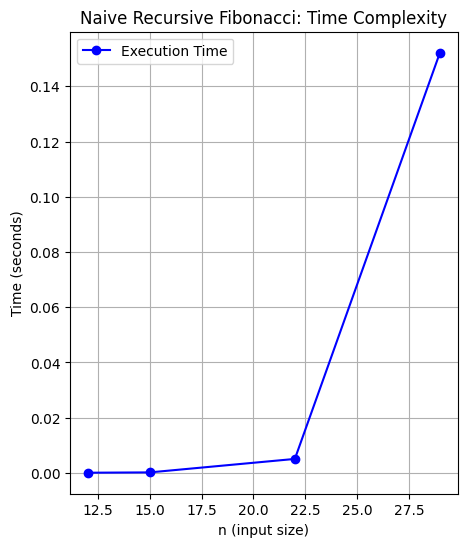

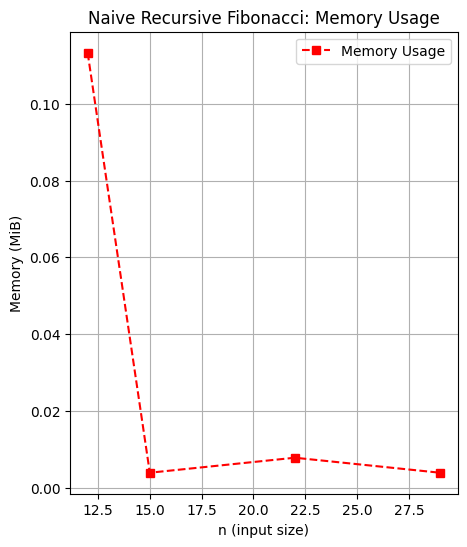

In [4]:


sizes = [12, 15, 22, 29]
times = []
memories = []

for n in sizes:
    t = time_function(fibonacci_recursive, n, repeats=1)
    m = peak_memory_used(fibonacci_recursive, n)
    times.append(t)
    memories.append(m)
    print(f"n={n:2d} -> time={t:.6f} s, peak memory={m:.6f} MiB")

plt.figure(figsize=(5, 6))
plt.plot(sizes, times, marker='o', linestyle='-', color='b', label="Execution Time")
plt.title("Naive Recursive Fibonacci: Time Complexity")
plt.xlabel("n (input size)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(5, 6))
plt.plot(sizes, memories, marker='s', linestyle='--', color='r', label="Memory Usage")
plt.title("Naive Recursive Fibonacci: Memory Usage")
plt.xlabel("n (input size)")
plt.ylabel("Memory (MiB)")
plt.grid(True)
plt.legend()
plt.show()

n=  1000 -> time=0.000143 s, peak memory=0.000000 MiB
n= 10000 -> time=0.003139 s, peak memory=0.000000 MiB
n= 50000 -> time=0.033686 s, peak memory=0.007812 MiB
n=100000 -> time=0.121665 s, peak memory=0.000000 MiB


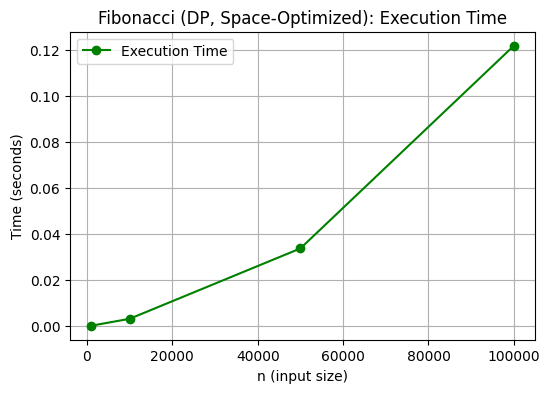

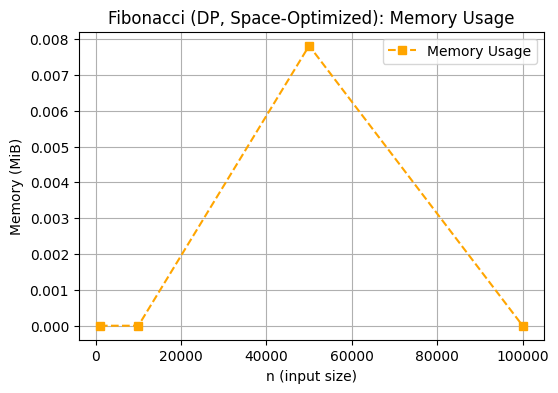

In [5]:
import time
import random
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from typing import Callable, Any

def time_function(fn: Callable[..., Any], *args, repeats: int = 3, **kwargs) -> float:
    durations = []
    for _ in range(repeats):
        start = time.perf_counter()
        fn(*args, **kwargs)
        end = time.perf_counter()
        durations.append(end - start)
    return sum(durations) / len(durations)

def peak_memory_used(fn: Callable[..., Any], *args, **kwargs) -> float:
    mem_usage = memory_usage((fn, args, kwargs), interval=0.05, max_iterations=1)
    return max(mem_usage) - mem_usage[0]


def fibonacci_dp(n: int) -> int:
    """
    Compute the nth Fibonacci number using space-optimized DP.
    Time: O(n), Space: O(1)
    """
    if n < 0:
        raise ValueError("Input must be a non-negative integer")
    if n <= 1:
        return n

    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b


sizes = [1000, 10000, 50000, 100000]
times = []
memories = []

for n in sizes:
    t = time_function(fibonacci_dp, n)
    m = peak_memory_used(fibonacci_dp, n)
    times.append(t)
    memories.append(m)
    print(f"n={n:6d} -> time={t:.6f} s, peak memory={m:.6f} MiB")


plt.figure(figsize=(6, 4))
plt.plot(sizes, times, marker='o', color='green', label="Execution Time")
plt.title("Fibonacci (DP, Space-Optimized): Execution Time")
plt.xlabel("n (input size)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(6, 4))
plt.plot(sizes, memories, marker='s', color='orange', linestyle='--', label="Memory Usage")
plt.title("Fibonacci (DP, Space-Optimized): Memory Usage")
plt.xlabel("n (input size)")
plt.ylabel("Memory (MiB)")
plt.grid(True)
plt.legend()
plt.show()

In [6]:
from typing import List

def merge(left: List[int], right: List[int]) -> List[int]:
    """
    Merge two sorted lists into a single sorted list.

    Args:
        left (List[int]): First sorted sublist.
        right (List[int]): Second sorted sublist.

    Returns:
        List[int]: Merged sorted list.
    """
    i = j = 0
    result: List[int] = []

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1


    result.extend(left[i:])
    result.extend(right[j:])

    return result

In [7]:
from typing import List

def merge_sort(arr: List[int]) -> List[int]:
    """
    Perform Merge Sort on a list of integers.

    Args:
        arr (List[int]): List of integers to be sorted.

    Returns:
        List[int]: Sorted list of integers.

    Time Complexity:
        O(n log n) in best, average, and worst cases.
    Space Complexity:
        O(n) (extra space for merging).
    Stable:
        Yes — maintains relative order of equal elements.
    """
    if not arr:
        return []

    if len(arr) == 1:
        return arr[:]

    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)


In [8]:
arr = [2, 3, 1, 8, 7]
print("Original List:", arr)
print("Sorted List  :", merge_sort(arr))

Original List: [2, 3, 1, 8, 7]
Sorted List  : [1, 2, 3, 7, 8]


In [9]:
import random
from typing import List

def quick_sort(arr: List[int]) -> List[int]:
    """
    Quick Sort (recursive, randomized pivot).

    Args:
        arr (List[int]): List of integers to sort.

    Returns:
        List[int]: Sorted list.

    Time Complexity:
        Average: O(n log n)
        Worst: O(n^2) (rare, if unlucky with pivots)
    Space Complexity:
        O(log n) recursion stack (average case).
    Stable:
        No (equal elements may change order).
    """
    if len(arr) <= 1:
        return arr[:]

    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    return quick_sort(left) + mid + quick_sort(right)



arr = [2, 5, 1, 7, 4]
print("Original List:", arr)
print("Sorted List  :", quick_sort(arr))


Original List: [2, 5, 1, 7, 4]
Sorted List  : [1, 2, 4, 5, 7]


In [10]:
from typing import List

def insertion_sort(arr: List[int]) -> List[int]:
    """
    Insertion Sort Algorithm.

    Args:
        arr (List[int]): List of integers to be sorted.

    Returns:
        List[int]: Sorted list of integers.

    Time Complexity:
        Best Case:  O(n)     (already sorted list)
        Worst Case: O(n^2)   (reverse sorted list)
        Average:    O(n^2)
    Space Complexity:
        O(1) – in-place sorting.
    Stable:
        Yes – preserves order of equal elements.
    """
    a = arr[:]
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1

        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key
    return a



arr = [5, 4, 3, 2, 1]
print("Original List:", arr)
print("Sorted List  :", insertion_sort(arr))

Original List: [5, 4, 3, 2, 1]
Sorted List  : [1, 2, 3, 4, 5]


In [11]:
from typing import List

def bubble_sort(arr: List[int]) -> List[int]:
    """
    Bubble Sort Algorithm.

    Args:
        arr (List[int]): List of integers to be sorted.

    Returns:
        List[int]: Sorted list of integers.

    Time Complexity:
        Best Case:  O(n)     (already sorted list, one pass with no swaps)
        Worst Case: O(n^2)   (reverse sorted list)
        Average:    O(n^2)
    Space Complexity:
        O(1) – in-place sorting.
    Stable:
        Yes – preserves order of equal elements.
    """
    a = arr[:]
    n = len(a)

    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
                swapped = True
        if not swapped:
            break

    return a



arr = [4, 7, 6, 1]
print("Original List:", arr)
print("Sorted List  :", bubble_sort(arr))

Original List: [4, 7, 6, 1]
Sorted List  : [1, 4, 6, 7]


In [12]:
from typing import List

def selection_sort(arr: List[int]) -> List[int]:
    """
    Selection Sort Algorithm.

    Args:
        arr (List[int]): List of integers to be sorted.

    Returns:
        List[int]: Sorted list of integers.

    Time Complexity:
        Best Case:  O(n^2)
        Worst Case: O(n^2)
        Average:    O(n^2)
    Space Complexity:
        O(1) – in-place sorting.
    Stable:
        No – equal elements may not preserve their relative order.
    """
    a = arr[:]
    n = len(a)

    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]

    return a



arr = [24, 22, 20, 19, 17]
print("Original List:", arr)
print("Sorted List  :", selection_sort(arr))

Original List: [24, 22, 20, 19, 17]
Sorted List  : [17, 19, 20, 22, 24]


In [13]:
from typing import List

def binary_search(arr: List[int], target: int) -> int:
    """
    Binary Search Algorithm.

    Args:
        arr (List[int]): Sorted list of integers.
        target (int): Value to search for.

    Returns:
        int: Index of target in arr, or -1 if not found.

    Time Complexity:
        Best Case:  O(1)
        Worst Case: O(log n)
        Average:    O(log n)
    Space Complexity:
        O(1)
    Stable:
        N/A (search algorithm).
    """
    low, high = 0, len(arr) - 1

    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1

    return -1



arr = [10, 20, 30, 40, 50]
print("Searching 10:", binary_search(arr, 10))  # ✅ Found at index 4
print("Searching 7 :", binary_search(arr, 7))   # ❌ Not found (-1)
print("Searching 0 :", binary_search(arr, 0))   # ✅ Found at index 3
print("Searching 20:", binary_search(arr, 20))  # ✅ Found at index 2

Searching 10: 0
Searching 7 : -1
Searching 0 : -1
Searching 20: 1


Merge Sort: [0.0001571178436279297, 0.0009121894836425781, 0.0018398761749267578, 0.006487369537353516]
Quick Sort: [0.0001628398895263672, 0.0007798671722412109, 0.0016906261444091797, 0.004281282424926758]
Insertion Sort: [0.0002033710479736328, 0.0073528289794921875, 0.022876262664794922, 0.10774493217468262]
Bubble Sort: [0.0006918907165527344, 0.0191652774810791, 0.06090974807739258, 0.21965551376342773]
Selection Sort: [0.00019884109497070312, 0.006420612335205078, 0.02422046661376953, 0.10029363632202148]


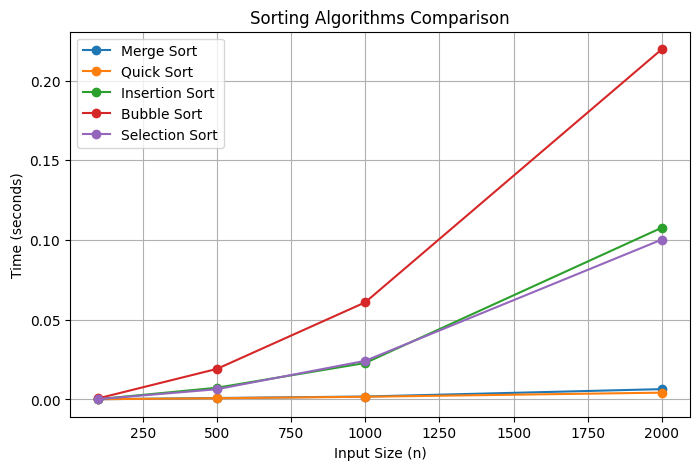

In [14]:
import random
import time
import matplotlib.pyplot as plt
from typing import List


def merge_sort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left: List[int], right: List[int]) -> List[int]:
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i]); i += 1
        else:
            result.append(right[j]); j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def quick_sort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)

def insertion_sort(arr: List[int]) -> List[int]:
    a = arr[:]
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a

def bubble_sort(arr: List[int]) -> List[int]:
    a = arr[:]
    n = len(a)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
                swapped = True
        if not swapped:
            break
    return a

def selection_sort(arr: List[int]) -> List[int]:
    a = arr[:]
    n = len(a)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
    return a


def generate_random_array(n: int) -> List[int]:
    return [random.randint(0, 10000) for _ in range(n)]

def time_function(fn, arr: List[int]) -> float:
    start = time.time()
    fn(arr)
    end = time.time()
    return end - start


sizes = [100, 500, 1000, 2000]
algos = {
    'Merge Sort': merge_sort,
    'Quick Sort': quick_sort,
    'Insertion Sort': insertion_sort,
    'Bubble Sort': bubble_sort,
    'Selection Sort': selection_sort
}

results = {}
for name, fn in algos.items():
    times = []
    for n in sizes:
        arr = generate_random_array(n)
        t = time_function(fn, arr)
        times.append(t)
    results[name] = times
    print(f"{name}: {times}")


plt.figure(figsize=(8, 5))
for name, times in results.items():
    plt.plot(sizes, times, marker='o', label=name)

plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithms Comparison')
plt.legend()
plt.grid(True)
plt.show()